In [12]:
import os
import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm 

In [13]:
def create_color_to_label_map(mask_folder_path):
    """
    Scans all masks in a folder to find unique colors and create a mapping
    from color to a class label.
    """
    print(f"Scanning masks in '{mask_folder_path}'...")
    
    unique_colors = set()
    

    mask_files = os.listdir(mask_folder_path)
    print(mask_files)
   
    for filename in tqdm(mask_files, desc="Finding unique colors"):
        mask_path = os.path.join(mask_folder_path, filename)
        
        # Open the mask image and convert to a NumPy array
        mask_bgr = cv2.imread(mask_path)

        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        # Reshape the (H, W, C) array to (H*W, C) to get a list of pixels
        pixels = mask_rgb.reshape(-1, 3)
        
        # Get unique rows (unique RGB colors)
        unique_pixel_colors = np.unique(pixels, axis=0)
        
        # Add the unique colors found in this image to our overall set
        for color in unique_pixel_colors:
            unique_colors.add(tuple(color))
            

    sorted_colors = sorted(list(unique_colors))
    
    # Create the color-to-label dictionary
    color_to_label = {color: label for label, color in enumerate(sorted_colors)}
    
    print("\nScan complete!")
    print(f"Found {len(color_to_label)} unique classes.")
    
    return color_to_label

In [14]:
mask_path = "data_dataset_voc/SegmentationClass/"
COLOR_TO_LABEL = create_color_to_label_map(mask_path)
COLOR_TO_LABEL

Scanning masks in 'data_dataset_voc/SegmentationClass/'...
['cat.6.png', 'cat.24.png', 'cat.30.png', 'cat.18.png', 'dog.22.png', 'dog.36.png', 'dog.37.png', 'dog.23.png', 'cat.19.png', 'cat.31.png', 'cat.25.png', 'cat.7.png', 'cat.5.png', 'cat.33.png', 'cat.27.png', 'dog.35.png', 'dog.21.png', 'dog.20.png', 'dog.34.png', 'cat.26.png', 'cat.32.png', 'cat.4.png', 'cat.0.png', 'cat.36.png', 'cat.22.png', 'cat.149.png', 'dog.30.png', 'dog.149.png', 'dog.24.png', 'dog.18.png', 'dog.19.png', 'dog.148.png', 'dog.25.png', 'dog.31.png', 'cat.148.png', 'cat.23.png', 'cat.37.png', 'cat.1.png', 'cat.3.png', 'cat.21.png', 'cat.35.png', 'dog.27.png', 'dog.33.png', 'dog.32.png', 'dog.26.png', 'cat.34.png', 'cat.20.png', 'cat.2.png', 'cat.47.png', 'cat.53.png', 'cat.138.png', 'cat.110.png', 'dog.82.png', 'cat.104.png', 'dog.96.png', 'cat.84.png', 'dog.110.png', 'dog.104.png', 'cat.90.png', 'dog.69.png', 'dog.1.png', 'dog.41.png', 'dog.138.png', 'dog.55.png', 'dog.139.png', 'dog.54.png', 'dog.40.png', 

Finding unique colors: 100%|██████████| 301/301 [00:44<00:00,  6.73it/s]


Scan complete!
Found 3 unique classes.


{(0, 0, 0): 0, (0, 128, 0): 1, (128, 0, 0): 2}

In [15]:
mask_output_folder="data_dataset_voc/SegmentationClass/"
mask_output_folder="data_dataset_voc/SegmentationClassEncoded/"

In [16]:
import numpy as np
import cv2
from tqdm import tqdm

def encode_masks_in_folder(input_folder, output_folder, color_map):
    """
    Converts all RGB masks in a folder to grayscale masks using the provided color_map.
    Saves the grayscale masks in the output folder with the same filenames.
    """
    os.makedirs(output_folder, exist_ok=True)
    
    # List all image files
    mask_files = [f for f in os.listdir(input_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    
    for mask_file in tqdm(mask_files, desc="Encoding masks"):
        mask_path = os.path.join(input_folder, mask_file)
        mask_bgr = cv2.imread(mask_path)
        
        if mask_bgr is None:
            print(f"Warning: cannot read {mask_path}")
            continue
        
        mask_rgb = cv2.cvtColor(mask_bgr, cv2.COLOR_BGR2RGB)
        height, width, _ = mask_rgb.shape
        mask_grayscale = np.zeros((height, width), dtype=np.uint8)
        
        # Encode mask
        for color, label in color_map.items():
            matches = np.all(mask_rgb == color, axis=-1)
            mask_grayscale[matches] = label
        
        # Save grayscale mask
        output_path = os.path.join(output_folder, mask_file)
        cv2.imwrite(output_path, mask_grayscale)

# ==========================
# Example usage
# ==========================
color_map = {
    (0, 0, 0): 0,       # background
    (128, 0, 0): 1,     # cat
    (0, 128, 0): 2      # dog
}

input_folder = "data_dataset_voc/SegmentationClass/"
output_folder = "data_dataset_voc/SegmentationClassEncoded/"

encode_masks_in_folder(input_folder, output_folder, color_map)




Encoding masks: 100%|██████████| 301/301 [00:04<00:00, 71.24it/s]


### Reread the encoded mask

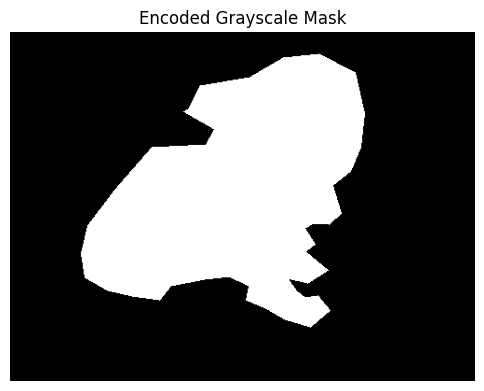

In [22]:

import cv2
import matplotlib.pyplot as plt

# Path to the encoded mask
save_path = "data_dataset_voc/SegmentationClassEncoded/dog.0.png"

# Load the mask in grayscale / unchanged mode
new_grayscale_label_mask = cv2.imread(save_path, cv2.IMREAD_UNCHANGED)  # keeps original values

# Display the mask
plt.figure(figsize=(6,6))
plt.imshow(new_grayscale_label_mask, cmap='gray')  # grayscale colormap
plt.title("Encoded Grayscale Mask")
plt.axis('off')
plt.show()
